author: ilian
author: ahavrius

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 # Part I

1. Create a matrix of random values of a distribution of your choice.

In [2]:
np.asmatrix(np.random.random((2,2)) * 10)

matrix([[5.36621522, 4.29595929],
        [7.67636213, 5.67054944]])

2. Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.

In [3]:
np.array(range(12)).reshape(4, 3)

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

3. Write a function that creates an incremental array of dimension (1,n) with values
between 0 and 1. Use arr.shape to verify

In [4]:
def create_arr(n):
    return np.random.random((1,n))

In [5]:
test = create_arr(3)
print(test)
print(test.shape)

[[0.50696669 0.36676348 0.0113175 ]]
(1, 3)


4. Generate a 10x12 array and extract row 0-4 of columns 8-12.

In [6]:
arr = np.array(np.random.random((10, 12))*100)
print(arr)
arr[:4, 8:]

[[2.76893359e+01 2.41136153e+01 5.26616350e+01 8.22116441e+01
  2.40790191e+00 5.65746877e+01 4.30810242e+01 3.50815958e+01
  9.98222162e+01 6.77849494e+01 7.68533611e+00 7.31605303e+01]
 [5.23870770e+01 1.37698891e+01 5.78807185e+01 3.43342560e+00
  3.72838837e+01 4.16134757e+01 3.71247360e+01 9.20082017e+01
  2.06149067e+01 7.54851386e+01 3.62079939e+01 3.64336044e+01]
 [9.76497123e+01 3.63852181e+00 4.69012312e+01 1.43468199e+01
  9.63508874e+00 8.17875631e+01 2.47066192e+01 2.01853444e+01
  1.15982030e+01 5.01095018e+01 8.86022221e+01 2.36858740e+01]
 [3.02215296e+01 5.86573999e+01 2.71966606e+01 3.68331457e+01
  4.48829934e+01 6.87837458e+01 5.12652397e+01 5.81283784e+00
  2.65901807e+01 2.37645660e+00 8.71814119e+00 1.57174929e+01]
 [2.90357798e+01 9.92079643e+01 3.89957098e+01 6.62144638e+00
  7.54276113e+01 5.38903512e+01 3.42164200e+01 7.21585970e-02
  6.87963787e+01 9.32156553e+01 9.34049424e+01 5.63997910e+01]
 [2.13719447e+01 2.30982310e+01 3.46891342e+01 7.84506480e+01
  9

array([[99.82221621, 67.78494939,  7.68533611, 73.1605303 ],
       [20.61490671, 75.48513859, 36.20799393, 36.43360437],
       [11.59820296, 50.10950179, 88.60222215, 23.68587401],
       [26.59018066,  2.3764566 ,  8.71814119, 15.71749292]])

5. Using the function in Q3, get m vectors and bind them together (to have a m x n)
matrix. Plot the matrix with matplotlib’s imshow

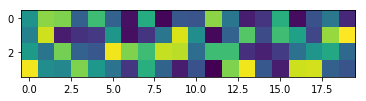

In [7]:
m = 4
n = 20
arr = []
for i in range(m):
    arr.append(create_arr(n)[0])
arr = np.asmatrix(arr)
plt.imshow(arr)

6. Multiply the resulting matrix from Q5 with the matrix of a picture of your choice.
Plot the resulting matrix.

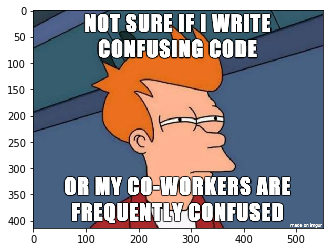

In [8]:
mem = plt.imread('./mem.png')
plt.imshow(mem)

In [9]:
mem = np.reshape(mem, (mem.shape[0]*mem.shape[1], mem.shape[2]))
mem * arr

matrix([[1.34105112, 0.99009997, 0.87027733, ..., 1.1794987 , 0.77921874,
         0.64543012],
        [1.34105112, 0.99009997, 0.87027733, ..., 1.1794987 , 0.77921874,
         0.64543012],
        [1.34105112, 0.99009997, 0.87027733, ..., 1.1794987 , 0.77921874,
         0.64543012],
        ...,
        [1.56751739, 1.27202718, 1.13054217, ..., 1.34768527, 1.05851568,
         0.8621934 ],
        [1.56751739, 1.27202718, 1.13054217, ..., 1.34768527, 1.05851568,
         0.8621934 ],
        [1.56751739, 1.27202718, 1.13054217, ..., 1.34768527, 1.05851568,
         0.8621934 ]])

# Part II

In [10]:
photoOriginal = plt.imread('./example.png')

Supportive functions

In [11]:
def normalize(photo):
    return np.minimum(np.ones(photo.shape), np.maximum(np.zeros((photo.shape)), photo))

In [12]:
def vignette(photo, coefRadius, coefBrightness):
    b = 0.5 * coefBrightness
    bright = np.array([b, b, b, 0])
    n = photo.shape[0]
    m = photo.shape[1]
    edgeRadius = (n**2 + m**2)/16 * coefRadius
    centreRadius = (n**2 + m**2)/4
    radiusBrightness = np.ones(photo.shape)
    for i in range(n):
        for j in range(m):
            radiusBrightness[i][j] += bright * (edgeRadius - (i - n/2)**2  - (j - m/2)**2)/centreRadius
    return normalize(photo*radiusBrightness)

# Mayfair

In [13]:
def mayfair(photoOriginal):
    bright = np.array([0.95, 0.95, 0.95, 0])
    n = photoOriginal.shape[0]
    m = photoOriginal.shape[1]
    edgeRadius = (n**2 + m**2)/8
    centreRadius = (n**2 + m**2)/4
    radiusBrightness = np.ones(photoOriginal.shape)
    for i in range(n):
        for j in range(m):
            radiusBrightness[i][j] += bright * (edgeRadius - (i - n/2)**2  - (j - m/2)**2)/centreRadius
    return normalize(photoOriginal*radiusBrightness*[1.3, 1.1, 1, 1])

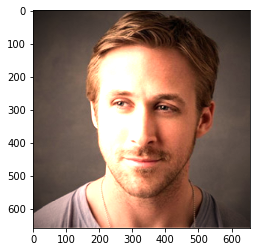

In [15]:
photoFiltredMayfair = mayfair(photoOriginal)
plt.imshow(photoFiltredMayfair)

# RISE

In [25]:
def rise(inputPhoto):
    #making the image more yellow
    colorShift = np.array([1.2, 1.2, 1, 1])
    return vignette(inputPhoto * colorShift, 1, 1)

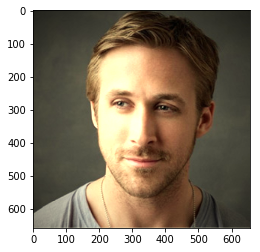

In [26]:
photoFiltredRice = rise(photoOriginal)
plt.imshow(photoFiltredRice)

# HUDSON

In [27]:
def hudson(inputPhoto):
    #making the image colder and brighter
    colorShift = np.array([1.1, 1.1, 1.3, 1])
    return vignette(inputPhoto * colorShift, 1, 1)

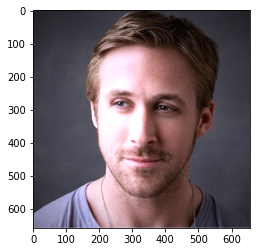

In [28]:
photoFiltredHudson = hudson(photoOriginal)
plt.imshow(photoFiltredHudson)

# EARLYBIRD

In [285]:
def earlybird(imageInput):
    #find the mean of each color
    avg = np.mean(imageInput, axis = (0, 1))
    #making less bright
    contrast = 0.65 #koef of brightess
    imageNew = abs(imageInput + avg * contrast)
    filteredVector = avg + contrast * (imageInput - avg)
    #adding yellow and dark = to put less blue
    filterIm = ([1.35, 1.2, 1.1, 1])
    return vignette(filteredVector * filterIm, 1, 3)
   

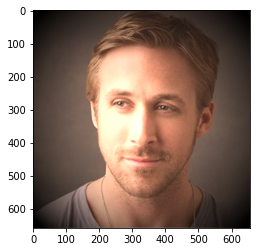

In [286]:
photoFiltredEarlybird = earlybird(photoOriginal)
plt.imshow(photoFiltredEarlybird)

# LO-FI

making the img brighter and with color shift

In [29]:
def lo_fi(photoInput):
    # main vector of shift
    coef = [0.3, 0.6, 0.15, 1]
    avg = np.average(photoInput * coef)
    contrast = 2
    # increase contrast
    photoFiltred = avg + contrast * (photoInput - avg)
    return normalize(photoFiltred)


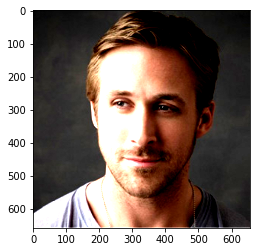

In [30]:
photoFiltredLo_fi = lo_fi(photoOriginal)
plt.imshow(photoFiltredLo_fi)

# INKWELL

In [31]:
def inkwell(photoInput):
    # Count average of brightness allover image
    coef = np.array([0.299, 0.587, 0.114, 1])
    avg = np.average(photoInput * coef)
    contrast = 1.3
    # Increase contrast - raise the difference between channel and average (grayscale)
    filteredPhoto = avg + contrast * (photoInput - avg)
    filteredPhoto = normalize(filteredPhoto)
    # Make photo black and white
    for i in range(filteredPhoto.shape[0]):
        for k in range(filteredPhoto.shape[1]):
            avg = np.average(filteredPhoto[i][k][:3])
            for j in range(3):
                filteredPhoto[i][k][j] = avg
    return filteredPhoto

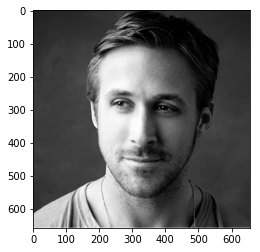

In [32]:
photoFiltredInkwell = inkwell(photoOriginal)
plt.imshow(photoFiltredInkwell)

# Brannan

In [39]:
def brannan(photoInput):
    #find the mean of each color
    avg = np.mean(photoInput, axis = (0, 1))
    #making gray
    coefGray = 0.5
    filteredPhoto = abs(avg + (photoInput - avg) * coefGray)
    
    # Count average of brightness allover image
    coefContrast = np.array([0.299, 0.587, 0.114, 1])
    avg = np.average(filteredPhoto * coefContrast)
    contrast = 4
    # Increase contrast - raise the difference between channel and average (grayscale)
    filteredPhoto = avg + contrast * (filteredPhoto - avg)
    
    #color change
    color = np.array([0.6, 0.8, 0.8, 1])
    filteredPhoto = filteredPhoto * color
    return normalize(filteredPhoto)

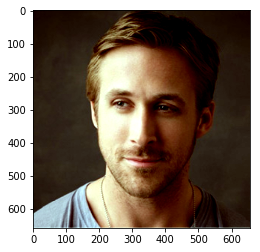

In [40]:
photoFiltredBrannan = brannan(photoOriginal)
plt.imshow(photoFiltredBrannan)

# KELVIN

In [41]:
def kelvin(photoInput):
    # main vector of shift
    coef = [0.3, 0.6, 0.15, 1]
    avg = np.average(photoInput * coef)
    contrast = 1.8
    # increase contrast
    photoFiltred = avg + contrast * (photoInput - avg)
    colorShift = [1.35, 1, 0.45, 1]
    photoFiltred *= colorShift
    return  normalize(photoFiltred + [0.2, 0.2, 0.2, 1])

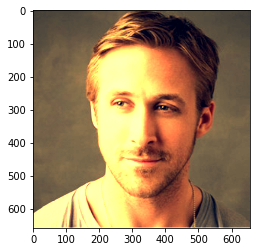

In [42]:
photoFiltredKelvin = kelvin(photoOriginal)
plt.imshow(photoFiltredKelvin)

# 1977

In [43]:
def ninetyth(imageInput):
     #find the mean of each color
    avg = np.mean(imageInput, axis = (0, 1))
    #making less bright
    koef = 2/3 #koef of brightess
    photoNew = abs(imageInput + avg * koef)
    #adding yellow and dark = to put less blue

    filterShift = [1.25, 1, 1, 1]
    return normalize(photoNew * filterShift)

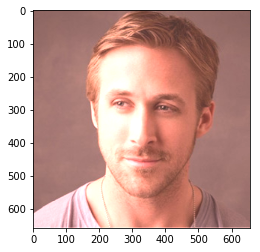

In [44]:
photoFiltredNinetyth = ninetyth(photoOriginal)
plt.imshow(photoFiltredNinetyth)